In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['figure.dpi']= 300
%matplotlib inline

# Data-Set Exploration

Explore the initial data sets for insight and clean-up.

In [2]:
# load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Use this cool graphic to check where there are NaN in the data-set (learned from Jose Portilla)

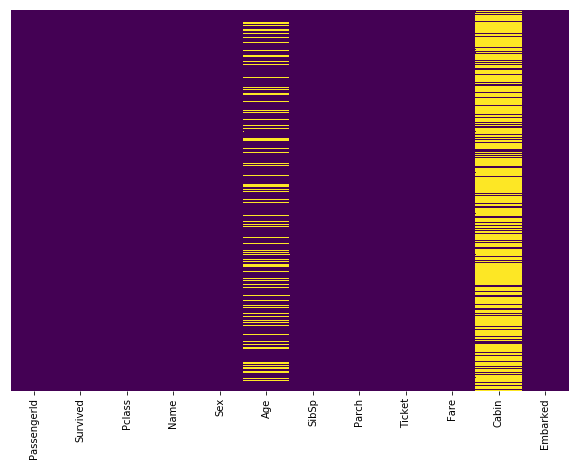

In [5]:
# train data-set
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

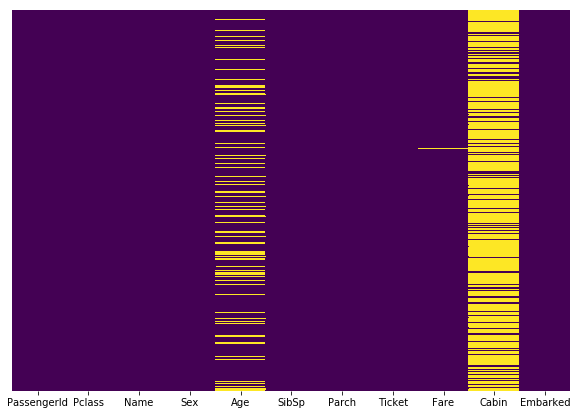

In [6]:
# test data-set
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looks like we'll have to deal with the 'Fare' column in the test data-set to get it aligned with the Train data-set.

Explore which passengers were most likely to survive. By sex:

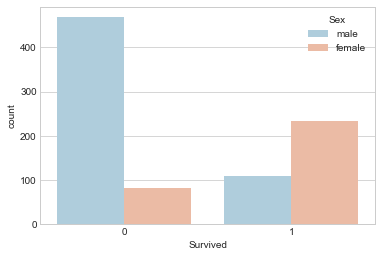

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

By class:

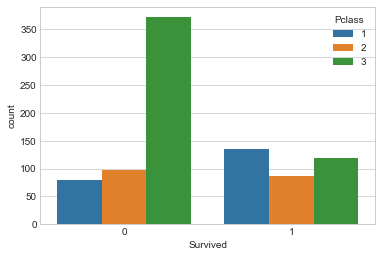

In [8]:
sns.countplot(x='Survived',data=train,hue='Pclass')

Do a histogram of the age:

C:\Users\Tim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


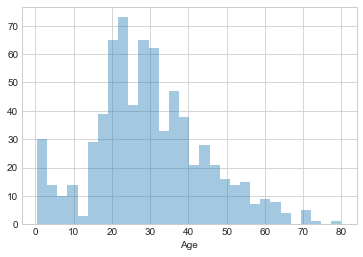

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

Now let's get some basic info on the data-sets. According to Kaggle, the test set needs to be 418 rows.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


How many siblings were on board?

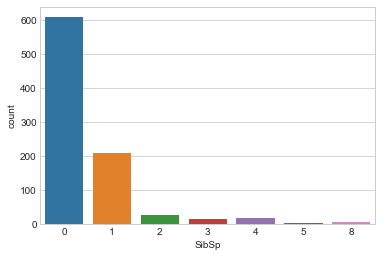

In [12]:
sns.countplot(x='SibSp',data=train)

Make a box-plot for the class and age of the passengers:

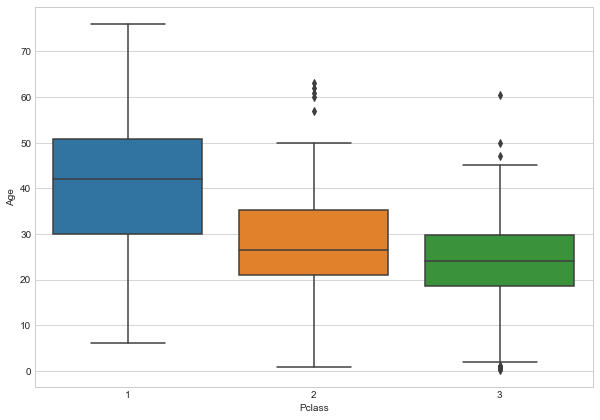

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

Now I want to calculate the mean age for the various classes. We will use this to impute the age for passengers with "blank" ages.

In [14]:
train[train['Pclass'] == 1]['Age'].dropna().mean()

38.233440860215055

In [15]:
train[train['Pclass'] == 2]['Age'].dropna().mean()

29.87763005780347

In [16]:
train[train['Pclass'] == 3]['Age'].dropna().mean()

25.14061971830986

Let's do the same thing for the fares (since there is a NAN fare in the test data-set).

In [17]:
train[train['Pclass'] == 1]['Fare'].dropna().mean()

84.15468749999992

In [18]:
train[train['Pclass'] == 2]['Fare'].dropna().mean()

20.66218315217391

In [19]:
train[train['Pclass'] == 3]['Fare'].dropna().mean()

13.675550101832997

Write two functions for imputing the age and fare:

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    # can find mean using: train[train['Pclass'] == 1]['Age'].dropna().mean()
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.12347
        elif Pclass == 2:
            return 29.8776
        else:
            return 25.14061
    else:
        return Age

def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]

    # can find mean using: train[train['Pclass'] == 1]['Fare'].dropna().mean()
    if pd.isnull(Fare):
        if Pclass == 1:
            return 84.1935
        elif Pclass == 2:
            return 20.662
        else:
            return 13.6756
    else:
        return Fare

Apply the impute functions to the Train data-set.

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Fare'] = train[['Fare','Pclass']].apply(impute_fare,axis=1)

Make another chart to see where we have blanks.

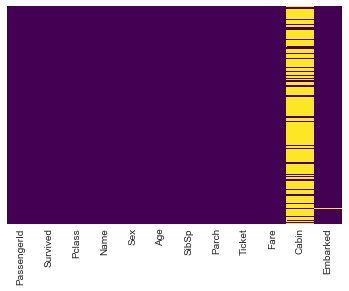

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looks like we'll have to drop an "Embarked" row. We will drop the entire "Cabin" column as well, since there are too many blanks to impute.

In [23]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

Great! Now let's check the Test data-set to make sure that it is ready for testing.

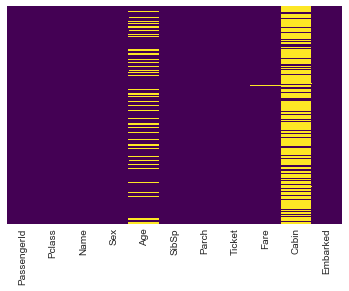

In [24]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Apply the impute functions to the Test data-set.

In [25]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)

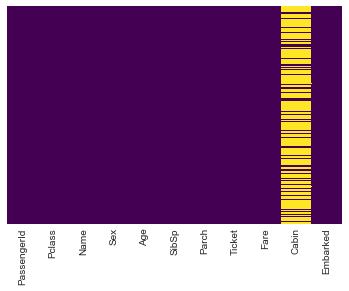

In [26]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looks good. Let's drop the "Cabin" column:

In [27]:
test.drop('Cabin',axis=1,inplace=True)

In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Now we need to get "dummies" for the catagorical values -- Sex, Embarked

In [34]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [35]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
train = pd.concat([train, sex, embark],axis=1)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1


Now we need to drop those catagorical columns, along with "Ticket" and "Name". We may feature engineer something with those in the future...

In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

Drop the "PassengerId" column.

In [39]:
test.drop('PassengerId',axis=1,inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


Done! All ready to do some predictions with the training data.

# Build Models

### Load the Data

I've created a python file (data_prep_lreg.py) to speed up the process of cleaning the data-files. The below analysis is done using this process.

**train1.pkl, test1.pkl**

Features used in logistic regression model:
<br>-Pclass, Age, SibSp, Parch, Fare, Male/Female, Embarked

In [72]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statistics as s
mpl.rcParams['figure.dpi']= 300
%matplotlib inline

# load pickle for basic training dataset
train = pd.read_pickle("train1.pkl")

# create a data-frame with the passengerid
train_pid = pd.DataFrame(train['PassengerId'])

In [73]:
train_pid.head()

,PassengerId
0,1
1,2
2,3
3,4
4,5


In [74]:
# load pickle for basic testing dataset
test = pd.read_pickle("test1.pkl")

# create a data-frame with the passengerid
test_pid = pd.DataFrame(test['PassengerId'])

In [75]:
test_pid.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


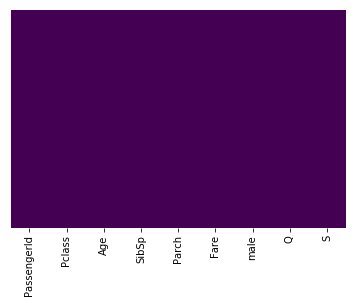

In [76]:
# check to see where the test data set has null fields
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [79]:
test = test.drop('PassengerId', axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


### Build Logistic Regression Model

**Train-Test-Split**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.33)

**Train and Predict**

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
pred = logmodel.predict(X_test)

### Evaluate Effectiveness of Logistic Regression Model

Let's look to see how effective the logistic regression model was.

In [85]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

Show the accuracy for this one test:

In [86]:
print("Accuracy", metrics.accuracy_score(y_test, pred))

Accuracy 0.8129251700680272


In [87]:
print(confusion_matrix(y_test,predictions))

[[106  68]
 [ 75  45]]


In [88]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       174
          1       0.82      0.69      0.75       120

avg / total       0.81      0.81      0.81       294



And because I always forget the definition of confusion matrices...

<img src='https://i.imgur.com/7EwDZFh.png'>

Now I want to see what the ROC curve is, to see how the model performs at different thresholds, and making easier to compare against other classification methods.

In [89]:
fpr, tpr, _ = metrics.roc_curve(y_test, logmodel.predict_proba(X_test)[:,1]) # [:,1] --> slice the array, taking all rows (:) but keeping the second column (1)

# calculate the AUC
roc_auc = auc(fpr, tpr)
print("ROC:",round(roc_auc,4))


ROC: 0.8469


Create the ROC curve. I learned this from the blog, listed below:

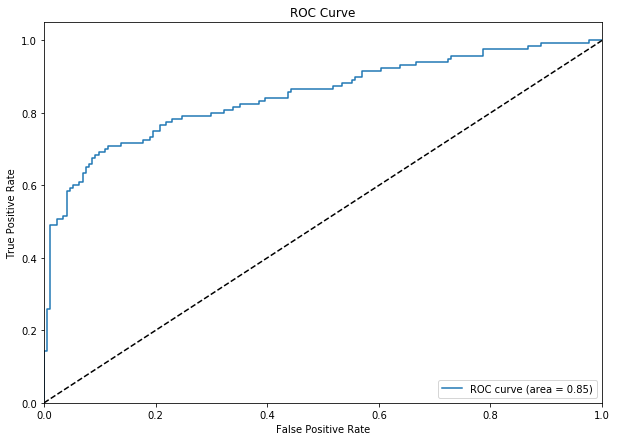

In [90]:
# http://www.ultravioletanalytics.com/blog/kaggle-titanic-competition-part-x-roc-curves-and-auc

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Calculate the test error rate (using 1000 iterations of a randomly selected test data-set, size 33%). This will make it easier to compare to other classification methods.

In [91]:
error_rate = []

for i in range(1,1000): 
    X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.33)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    p = logmodel.predict(X_test)
    error_rate.append(np.mean(p != y_test))
    i += 1
    
print("Error Rate:", round(s.mean(error_rate),4)) 
print("Accuracy:", round(1-s.mean(error_rate),4))

Error Rate: 0.1999
Accuracy: 0.8001


**Diversion**<br>I wanted to calculate the confusion matrix myself, so I found this on a stack-overflow type website. The hardest part was realizing that the y_test data is actually a pandas dataframe.

In [92]:
# from: https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.33)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

def perf_measure(y_actual, y_pred):
    y_actual = y_actual.tolist() # y_actual is a pandas dataframe
    y_pred = np.ndarray.tolist(y_pred)
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    i = 0
    l = len(y_pred)
    while i < l:
        if y_actual[i]==y_pred[i] and y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i] and y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
        i += 1

        metrics = [TP, FP, TN, FN]
        
    return(metrics)


In [93]:
perf_measure(y_test,predictions)

[76, 26, 151, 41]

In [94]:
print(confusion_matrix(y_test,predictions))

[[151  26]
 [ 41  76]]


**Diversion Over**

### Prepare for Answer Submission to Kaggle

In [96]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [98]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Fit the 

In [97]:
prediction = logmodel.predict(test)

ValueError: X has 8 features per sample; expecting 9

In [53]:
from sklearn.metrics import classification_report

In [54]:
# print(classification_report(test,prediction))
logreg_pred = pd.DataFrame()
logreg_pred['PassengerId'] = test_pid['PassengerId']
logreg_pred['Survived'] = prediction

In [55]:
logreg_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [56]:
logreg_pred.to_csv('logreg_pred.csv',index=False)